In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import matplotlib.ticker as ticker

from scipy import stats
import seaborn as sns
 
minorLocator = AutoMinorLocator()

# Load mass tables

In [2]:
ddme2=pd.read_csv('ddme2-table.dat',delimiter=r'\s+',skiprows=56)
nl3s=pd.read_csv('nl3s-table.dat.txt',delimiter=r'\s+',skiprows=56)
ddpc1=pd.read_csv('ddpc1-table.dat.txt',delimiter=r'\s+',skiprows=56)
ddpc1.head()

,Z,N,def,E,Lam_n,Lam_p,Ep_n,Ep_p,Rc,B2_n,B2_p,B4_n,B4_p,R2_n,R2_p
0,2,2,0.001,-21.017,-16.4,-15.1,0.00,0.00,2.183,0.001,0.001,-0.001,-0.001,2.017,2.031
1,2,4,0.005,-27.777,-2.0,-23.9,-6.20,0.00,2.136,0.008,0.000,0.000,0.000,2.567,1.981
2,2,6,0.000,-30.309,-0.8,-30.8,-5.60,0.00,2.135,0.000,0.000,0.000,0.000,2.836,1.979
3,4,2,0.014,-24.499,-24.7,-0.1,0.00,-6.16,2.757,0.001,0.020,0.000,0.004,1.979,2.639
4,4,4,0.000,-46.425,-9.0,-6.9,-6.09,-6.06,2.498,0.000,0.000,0.000,0.000,2.344,2.366


In [3]:
ddme2.describe()

,Z,N,def,E,Lam_n,Lam_p,Ep_n,Ep_p,Rc,B2_n,B2_p,B4_n,B4_p,R2_n,R2_p
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,66.552941,114.160000,0.107274,-1346.785316,-5.082706,-10.842765,-8.765324,-7.996982,5.188041,0.107025,0.107483,0.032009,0.033947,5.405817,5.123784
std,26.544711,53.394379,0.167392,520.282524,4.038334,6.375369,6.067885,4.648982,0.856980,0.168018,0.165998,0.067665,0.061256,0.926972,0.870226
min,2.000000,2.000000,-0.416000,-2146.192000,-24.800000,-30.300000,-33.930000,-22.660000,2.128000,-0.450000,-0.383000,-0.111000,-0.107000,1.976000,1.972000
25%,46.000000,72.000000,0.000000,-1774.608250,-7.700000,-15.800000,-12.107500,-11.057500,4.638250,0.000000,0.000000,-0.001000,0.000000,4.845750,4.568250
50%,70.000000,115.000000,0.128000,-1429.336000,-4.100000,-10.900000,-7.455000,-7.860000,5.371000,0.129500,0.123000,0.000000,0.002500,5.558500,5.311500
75%,88.000000,156.000000,0.258000,-974.482000,-1.800000,-5.500000,-4.820000,-5.150000,5.868000,0.258000,0.257250,0.072250,0.068000,6.151000,5.813000
max,118.000000,258.000000,0.950000,-21.670000,0.700000,1.300000,0.000000,0.000000,6.571000,0.946000,0.954000,0.522000,0.552000,7.224000,6.522000


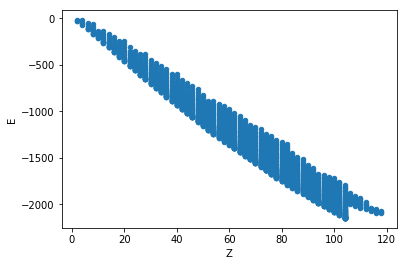

In [5]:
ddme2.plot(kind='scatter',x='Z',y='E')

In [6]:
ddme2['E/A']=ddme2['E']/(ddme2['Z']+ddme2['N'])
nl3s['E/A']=nl3s['E']/(nl3s['Z']+nl3s['N'])

ddme2['A']=(ddme2['Z']+ddme2['N'])
nl3s['A']=(nl3s['Z']+nl3s['N'])

In [7]:
ddme2.head(10)

,Z,N,def,E,Lam_n,Lam_p,Ep_n,Ep_p,Rc,B2_n,B2_p,B4_n,B4_p,R2_n,R2_p,E/A,A
0,2,2,0.001,-21.670,-17.2,-15.8,0.00,0.00,2.145,0.001,0.001,-0.003,-0.003,1.976,1.991,-5.417500,4
1,2,4,0.013,-27.393,-1.6,-24.2,-6.03,0.00,2.128,0.020,0.001,0.002,0.000,2.663,1.972,-4.565500,6
2,2,6,-0.008,-28.549,-0.3,-30.3,-6.30,0.00,2.142,-0.011,0.000,0.001,0.000,3.019,1.986,-3.568625,8
3,4,2,0.000,-24.198,-24.8,0.2,0.00,-6.03,2.869,0.000,0.000,0.000,0.000,1.976,2.755,-4.033000,6
4,4,4,0.950,-49.397,-8.8,-6.8,-0.62,-0.71,2.552,0.946,0.954,0.373,0.371,2.403,2.423,-6.174625,8
5,4,6,-0.231,-61.762,-6.0,-13.8,-1.99,-5.26,2.429,-0.233,-0.227,0.033,0.033,2.535,2.293,-6.176200,10
6,4,8,-0.001,-69.034,-5.2,-18.7,0.00,-5.89,2.463,-0.002,0.000,0.000,0.000,2.774,2.329,-5.752833,12
7,6,4,-0.227,-56.351,-15.6,-3.1,-5.37,-2.58,2.721,-0.220,-0.233,0.031,0.033,2.293,2.601,-5.635100,10
8,6,6,-0.347,-86.022,-16.6,-13.5,0.00,0.00,2.565,-0.344,-0.351,0.074,0.077,2.411,2.437,-7.168500,12
9,6,8,0.000,-104.303,-10.2,-14.5,0.00,-1.47,2.566,0.000,0.000,0.000,0.000,2.587,2.438,-7.450214,14


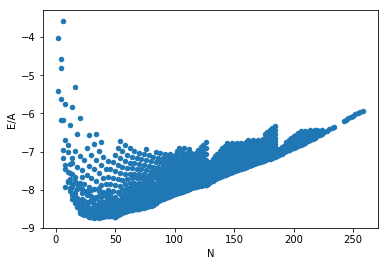

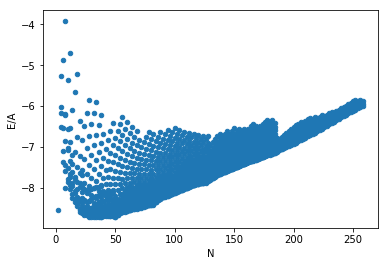

In [133]:
ddme2.plot(kind='scatter',x='N',y='E/A')
nl3s.plot(kind='scatter',x='N',y='E/A')

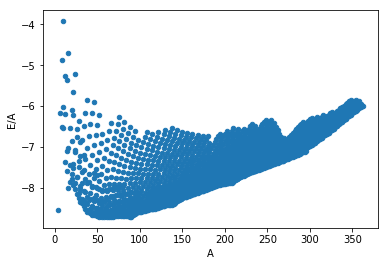

In [134]:
nl3s.plot(kind='scatter',x='A',y='E/A')

In [138]:
nl3s_Z82=nl3s[nl3s['Z']==82]
nl3s_Z82.rename(columns={'E':'E_nl3s'},inplace=True)
columns_drop=['Lam_n', 'Lam_p', 'Ep_n', 'Ep_p', 'Rc',
       'B2_n', 'B2_p', 'B4_n', 'B4_p', 'R2_n', 'R2_p', 'E/A', 'A']
nl3s_Z82.drop(columns_drop,axis=1,inplace=True)
nl3s_Z82.tail()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Z,N,def,E_nl3s
1326,82,176,0.0,-1785.371
1327,82,178,0.0,-1789.137
1328,82,180,0.0,-1792.678
1329,82,182,0.0,-1795.940
1330,82,184,0.0,-1798.789


In [140]:
nl3s_Z82.describe()

,Z,N,def,E_nl3s
count,46.0,46.000000,46.000000,46.000000
mean,82.0,139.000000,0.033522,-1650.117109
std,0.0,26.845235,0.160893,129.248845
min,82.0,94.000000,-0.185000,-1798.789000
25%,82.0,116.500000,-0.000750,-1756.416250
50%,82.0,139.000000,0.000000,-1687.051000
75%,82.0,161.500000,0.171000,-1565.733750
max,82.0,184.000000,0.304000,-1355.263000


In [136]:
ddme2_Z82=ddme2[ddme2['Z']==82]
ddme2_Z82.rename(columns={'E':'E_ddme2'},inplace=True)
ddme2_Z82.drop(columns_drop,axis=1,inplace=True)
ddme2_Z82.tail()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Z,N,def,E_ddme2
1157,82,176,0.0,-1777.737
1158,82,178,0.0,-1781.337
1159,82,180,0.0,-1784.796
1160,82,182,0.0,-1788.094
1161,82,184,0.0,-1791.196


In [141]:
ddme2_Z82.describe()

,Z,N,def,E_ddme2
count,46.0,46.000000,46.000000,46.000000
mean,82.0,139.000000,0.021217,-1646.632870
std,0.0,26.845235,0.156271,129.009373
min,82.0,94.000000,-0.183000,-1791.196000
25%,82.0,116.500000,-0.093750,-1752.689750
50%,82.0,139.000000,0.000000,-1685.529500
75%,82.0,161.500000,0.001000,-1562.903750
max,82.0,184.000000,0.285000,-1349.566000


In [137]:
ddme2_nl3s=ddme2_Z82.merge(nl3s_Z82,left_on='N', right_on='N', how='outer')
ddme2_nl3s['E_ddme2-E_nl3s']=ddme2_nl3s['E_ddme2']-ddme2_nl3s['E_nl3s']
ddme2_nl3s.tail()

,Z_x,N,def_x,E_ddme2,Z_y,def_y,E_nl3s,E_ddme2-E_nl3s
41,82,176,0.0,-1777.737,82,0.0,-1785.371,7.634
42,82,178,0.0,-1781.337,82,0.0,-1789.137,7.800
43,82,180,0.0,-1784.796,82,0.0,-1792.678,7.882
44,82,182,0.0,-1788.094,82,0.0,-1795.940,7.846
45,82,184,0.0,-1791.196,82,0.0,-1798.789,7.593


Text(165,0,'$Z=82$')

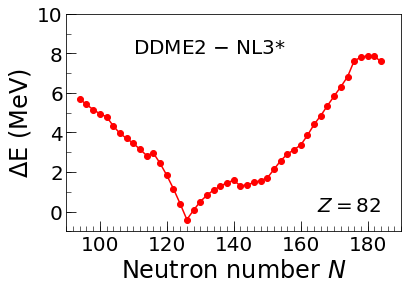

In [128]:
plt.plot(ddme2_nl3s['N'],ddme2_nl3s['E_ddme2-E_nl3s'],'-o',c='r') 

plt.xlim(90,190)
plt.ylim(-1,10)
plt.ylabel(r'$\Delta$E (MeV)',fontsize=24) 
plt.xlabel('Neutron number $N$',size=24)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(1))
    
    
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(2))
    
plt.tick_params(which='major',direction='in',length=10,labelsize=20)
plt.tick_params(which='minor',direction='in',length=5,labelsize=20)
  
plt.text(110,8,r'DDME2 $-$ NL3*',fontsize=20)
plt.text(165,0,r'$Z=82$',fontsize=20)
#plt.gca().vlines(96,-1,10)
#plt.gca().vlines(138,-1,10)

In [126]:
220-82

138

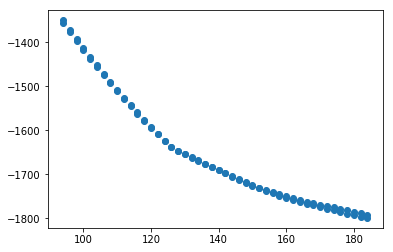

In [82]:
Z82=pd.concat([nl3s_Z82,ddme2_Z82],keys=['N','Z'])
#ddme2_Z82.merge(nl3s_Z82,on='')
plt.scatter(Z82['N'],Z82['E'])

ValueError: x and y must have same first dimension, but have shapes (46,) and (92,)

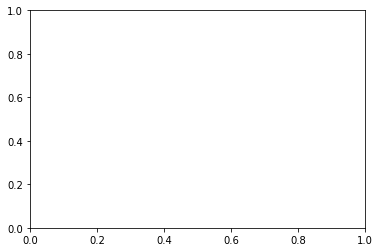

In [79]:
plt.plot(ddme2_Z82['N'],ddme2_Z82['E']-nl3s_Z82['E'])

In [ ]:
new_df.plot(kind='scatter',x='Z',y='E_nl3s-E_ddme2')

In [28]:
CDFT=pd.read_excel('All_Even-Even_Nuclei-Covariant_EDFs.xlsx',delimiter=r'\s+',skiprows=0)
CDFT.heaad()

,Z,N,Equilibrium_Quad_Def,Binding_Energy_(MeV),Chemical_Potential_N_(MeV),Chemical_Potential_P_(MeV),Pairing_Energy_N_(MeV),Pairing_Energy_P_(MeV),Charge_Radius_(fm),Quad_Def_Beta2_N,Quad_Def_Beta2_P,Quad_Def_Beta4_N,Quad_Def_Beta4_P,Mass_Radius_N_(fm),Mass_Radius_P_(fm)
0,2,2,0.001,-21.670,-17.2,-15.8,0.00,0.00,2.145,0.001,0.001,-0.003,-0.003,1.976,1.991
1,2,4,0.013,-27.393,-1.6,-24.2,-6.03,0.00,2.128,0.020,0.001,0.002,0.000,2.663,1.972
2,2,6,-0.008,-28.549,-0.3,-30.3,-6.30,0.00,2.142,-0.011,0.000,0.001,0.000,3.019,1.986
3,4,2,0.000,-24.198,-24.8,0.2,0.00,-6.03,2.869,0.000,0.000,0.000,0.000,1.976,2.755
4,4,4,0.950,-49.397,-8.8,-6.8,-0.62,-0.71,2.552,0.946,0.954,0.373,0.371,2.403,2.423


In [29]:
CDFT.columns

Index(['Z', 'N', 'Equilibrium_Quad_Def', 'Binding_Energy_(MeV)',
       'Chemical_Potential_N_(MeV)', 'Chemical_Potential_P_(MeV)',
       'Pairing_Energy_N_(MeV)', 'Pairing_Energy_P_(MeV)',
       'Charge_Radius_(fm)', 'Quad_Def_Beta2_N', 'Quad_Def_Beta2_P',
       'Quad_Def_Beta4_N', 'Quad_Def_Beta4_P', 'Mass_Radius_N_(fm)',
       'Mass_Radius_P_(fm)'],
      dtype='object')

In [30]:
CDFT.describe()

,Z,N,Equilibrium_Quad_Def,Binding_Energy_(MeV),Chemical_Potential_N_(MeV),Chemical_Potential_P_(MeV),Pairing_Energy_N_(MeV),Pairing_Energy_P_(MeV),Charge_Radius_(fm),Quad_Def_Beta2_N,Quad_Def_Beta2_P,Quad_Def_Beta4_N,Quad_Def_Beta4_P,Mass_Radius_N_(fm),Mass_Radius_P_(fm)
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,66.552941,114.160000,0.107274,-1346.785316,-5.082706,-10.842765,-8.765324,-7.996982,5.188041,0.107025,0.107483,0.032009,0.033947,5.405817,5.123784
std,26.544711,53.394379,0.167392,520.282524,4.038334,6.375369,6.067885,4.648982,0.856980,0.168018,0.165998,0.067665,0.061256,0.926972,0.870226
min,2.000000,2.000000,-0.416000,-2146.192000,-24.800000,-30.300000,-33.930000,-22.660000,2.128000,-0.450000,-0.383000,-0.111000,-0.107000,1.976000,1.972000
25%,46.000000,72.000000,0.000000,-1774.608250,-7.700000,-15.800000,-12.107500,-11.057500,4.638250,0.000000,0.000000,-0.001000,0.000000,4.845750,4.568250
50%,70.000000,115.000000,0.128000,-1429.336000,-4.100000,-10.900000,-7.455000,-7.860000,5.371000,0.129500,0.123000,0.000000,0.002500,5.558500,5.311500
75%,88.000000,156.000000,0.258000,-974.482000,-1.800000,-5.500000,-4.820000,-5.150000,5.868000,0.258000,0.257250,0.072250,0.068000,6.151000,5.813000
max,118.000000,258.000000,0.950000,-21.670000,0.700000,1.300000,0.000000,0.000000,6.571000,0.946000,0.954000,0.522000,0.552000,7.224000,6.522000


In [40]:
CDFT=pd.read_excel('All_Even-Even_Nuclei-Covariant_EDFs.xlsx',sheet_name=0,delimiter=r'\s+',skiprows=0)
CDFT.head()

,Z,N,Equilibrium_Quad_Def,Binding_Energy_(MeV),Chemical_Potential_N_(MeV),Chemical_Potential_P_(MeV),Pairing_Energy_N_(MeV),Pairing_Energy_P_(MeV),Charge_Radius_(fm),Quad_Def_Beta2_N,Quad_Def_Beta2_P,Quad_Def_Beta4_N,Quad_Def_Beta4_P,Mass_Radius_N_(fm),Mass_Radius_P_(fm)
0,2,2,0.001,-21.670,-17.2,-15.8,0.00,0.00,2.145,0.001,0.001,-0.003,-0.003,1.976,1.991
1,2,4,0.013,-27.393,-1.6,-24.2,-6.03,0.00,2.128,0.020,0.001,0.002,0.000,2.663,1.972
2,2,6,-0.008,-28.549,-0.3,-30.3,-6.30,0.00,2.142,-0.011,0.000,0.001,0.000,3.019,1.986
3,4,2,0.000,-24.198,-24.8,0.2,0.00,-6.03,2.869,0.000,0.000,0.000,0.000,1.976,2.755
4,4,4,0.950,-49.397,-8.8,-6.8,-0.62,-0.71,2.552,0.946,0.954,0.373,0.371,2.403,2.423


In [38]:
CDFT.head()

KeyError: 0